In [1]:
import pandas as pd
import statsmodels.api as sm
import lmdiag
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

In [2]:
concrete = pd.read_csv('Concrete_Data.csv') #read csv file
concrete.columns = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", 
                    "Coarse Aggregate", "Fine Aggregate", "Age", "Concrete Compressive Strength"]

## Data Preprocessing (nothing done to the data)

In [3]:
df_n = concrete.shape[0]

In [4]:
X = concrete.iloc[:, :-1].to_numpy()
Y = concrete.iloc[:, -1].to_numpy().reshape(df_n, 1)

In [7]:
X_n, X_m = X.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=156)

In [8]:
X_scaler = preprocessing.StandardScaler().fit(X_train)
Y_scaler = preprocessing.StandardScaler().fit(Y_train)

X_scaled = X_scaler.transform(X_train)
Y_scaled = Y_scaler.transform(Y_train)

In [9]:
sm.OLS(Y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          2.23e-158
Time:                        22:27:15   Log-Likelihood:                -2889.8
No. Observations:                 772   AIC:                             5798.
Df Residuals:                     763   BIC:                             5840.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.1099     30.530     -1.248      0.212     -98.043      21.823
x1             0.1262      0.010     13.010      0.000       0.107       0.145
x2             0.1100      0.012      9.459      0.000       0.087       0.133
x3             0.0957      0.014      6.667      0.000       0.068       0.124
x4            -0.1217      0.047     -2.609      0.009      -0.213      -0.030
x5             0.3439      0.110      3.120      0.002       0.128       0.560
x6             0.0212      0.011      1.975      0.049       0.000       0.042
x7             0.0251      0.012      2.051      0.041       0.001       0.049
x8             0.1119      0.006     18.915      0.000       0.100       0.123
==============================================================================
Omnibus:                        5.546   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.635
Skew:                          -0.197   Prob(JB):                       0.0598
Kurtosis:                       2.859   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<module 'matplotlib.pyplot' from 'C:\\Users\\Treasurer Tsang\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

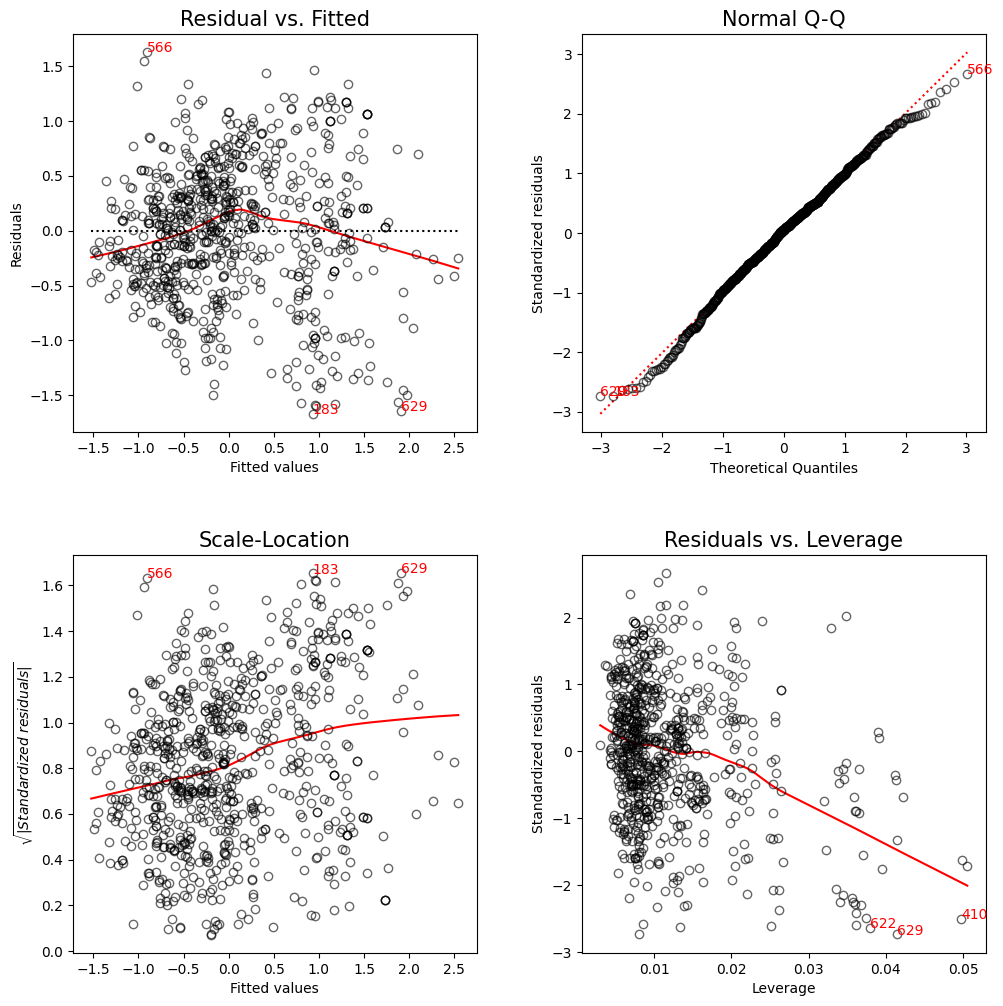

In [13]:
plt.figure(figsize = (10,10))
lmdiag.plot(sm.OLS(Y_scaled, sm.add_constant(X_train)).fit())

## Data Preprocessing (taking log of age)

In [14]:
X[:, 7] = np.log(X[:, 7])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=156)
X_scaler = preprocessing.StandardScaler().fit(X_train)
Y_scaler = preprocessing.StandardScaler().fit(Y_train)

X_scaled = X_scaler.transform(X_train)
Y_scaled = Y_scaler.transform(Y_train)

In [15]:
sm.OLS(Y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     454.8
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          2.42e-284
Time:                        22:31:14   Log-Likelihood:                -2595.5
No. Observations:                 772   AIC:                             5209.
Df Residuals:                     763   BIC:                             5251.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.4519     20.873     -3.136      0.002    -106.428     -24.476
x1             0.1318      0.007     19.902      0.000       0.119       0.145
x2             0.1124      0.008     14.184      0.000       0.097       0.128
x3             0.0927      0.010      9.498      0.000       0.074       0.112
x4            -0.1376      0.032     -4.321      0.000      -0.200      -0.075
x5             0.0992      0.076      1.311      0.190      -0.049       0.248
x6             0.0244      0.007      3.334      0.001       0.010       0.039
x7             0.0311      0.008      3.725      0.000       0.015       0.047
x8             8.7048      0.215     40.489      0.000       8.283       9.127
==============================================================================
Omnibus:                        4.090   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.985
Skew:                           0.174   Prob(JB):                        0.136
Kurtosis:                       3.050   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<module 'matplotlib.pyplot' from 'C:\\Users\\Treasurer Tsang\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

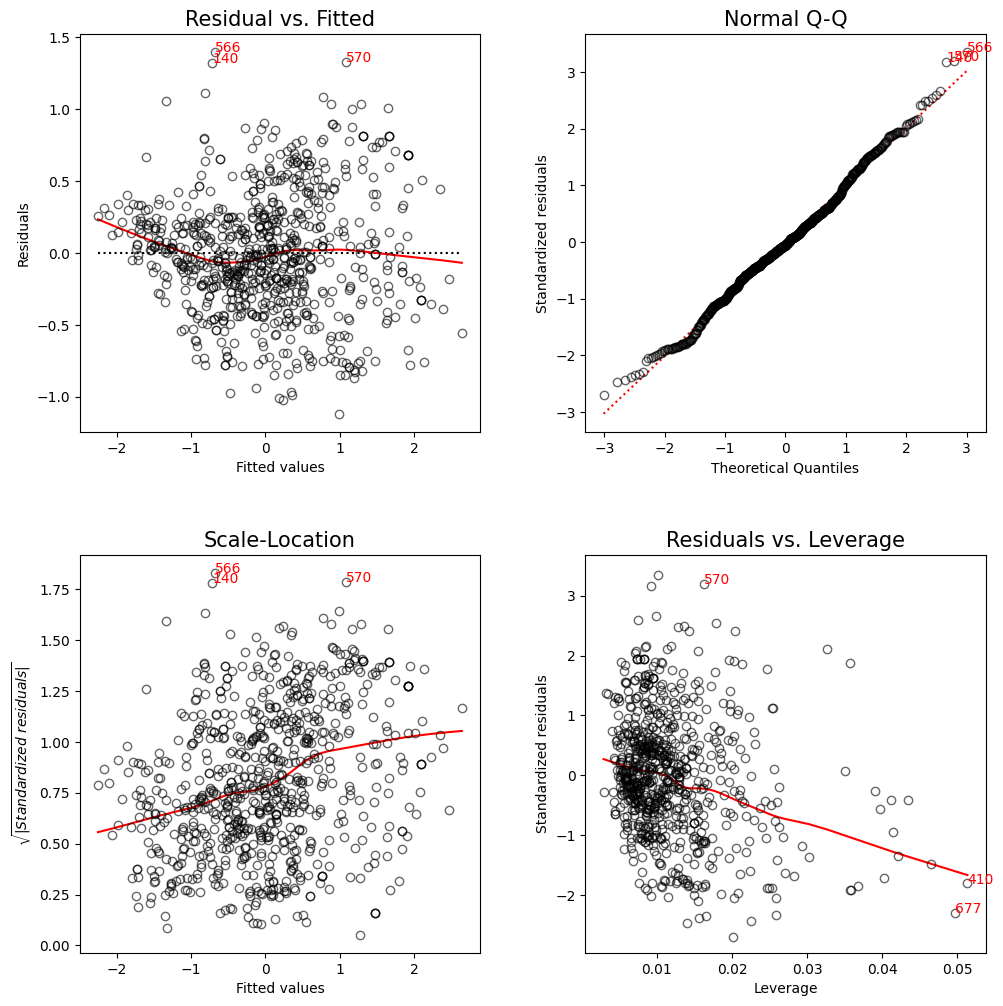

In [16]:
plt.figure(figsize = (10,10))
lmdiag.plot(sm.OLS(Y_scaled, sm.add_constant(X_train)).fit())

## Data Preprocessing (after taking log of age and removing superplasticizer)

In [17]:
X = np.hstack((X[:, :4], X[:, 5:]))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=156)
X_scaler = preprocessing.StandardScaler().fit(X_train)
Y_scaler = preprocessing.StandardScaler().fit(Y_train)

X_scaled = X_scaler.transform(X_train)
Y_scaled = Y_scaler.transform(Y_train)

In [18]:
sm.OLS(Y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     519.0
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          2.42e-285
Time:                        22:34:53   Log-Likelihood:                -2596.4
No. Observations:                 772   AIC:                             5209.
Df Residuals:                     764   BIC:                             5246.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.0094     19.600     -2.858      0.004     -94.486     -17.533
x1             0.1316      0.007     19.867      0.000       0.119       0.145
x2             0.1123      0.008     14.165      0.000       0.097       0.128
x3             0.0944      0.010      9.753      0.000       0.075       0.113
x4            -0.1602      0.027     -5.989      0.000      -0.213      -0.108
x5             0.0210      0.007      3.066      0.002       0.008       0.034
x6             0.0292      0.008      3.550      0.000       0.013       0.045
x7             8.7370      0.214     40.885      0.000       8.317       9.156
==============================================================================
Omnibus:                        3.762   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.640
Skew:                           0.165   Prob(JB):                        0.162
Kurtosis:                       3.062   Cond. No.                     1.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<module 'matplotlib.pyplot' from 'C:\\Users\\Treasurer Tsang\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

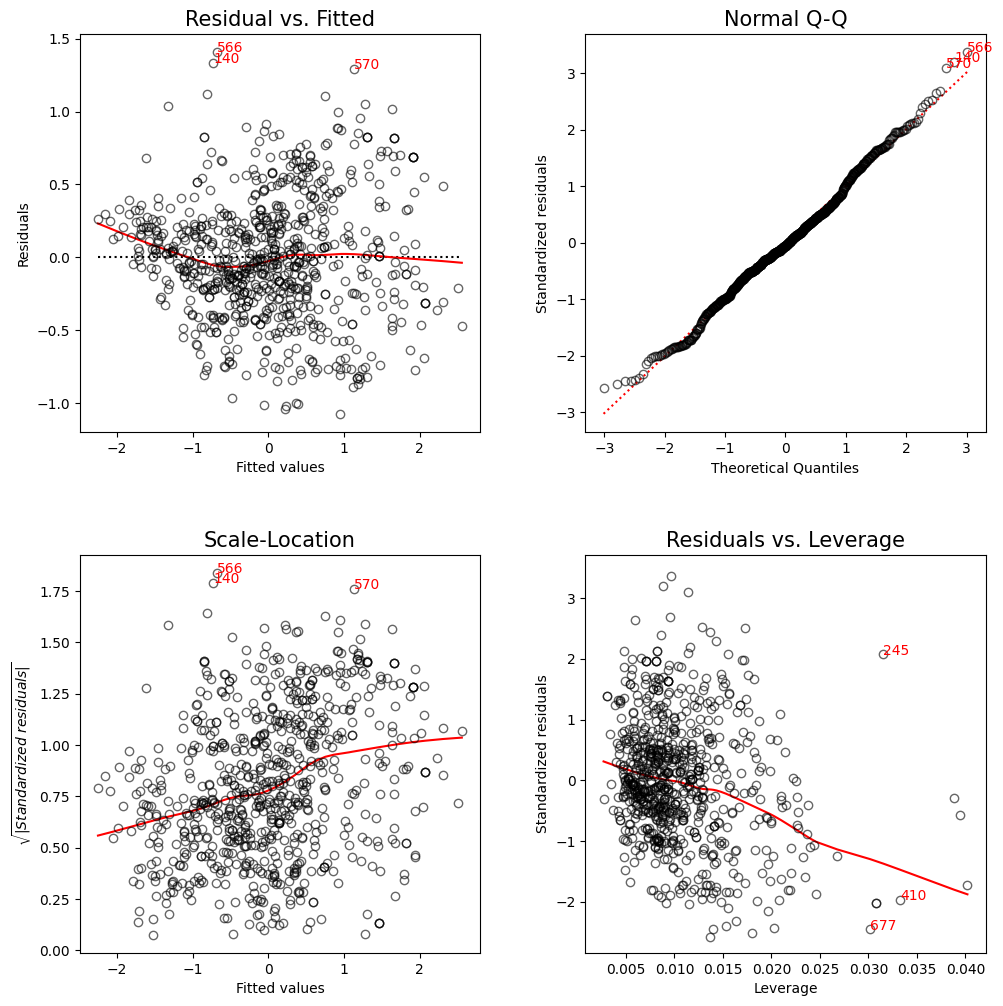

In [19]:
plt.figure(figsize = (10,10))
lmdiag.plot(sm.OLS(Y_scaled, sm.add_constant(X_train)).fit())

## remove outliers

In [20]:
concrete_no_outliers = concrete.drop(index=[245, 410, 677, 140, 566, 570])

df_n_no = concrete_no_outliers.shape[0]

X_no = concrete_no_outliers.iloc[:, :-1].to_numpy()
Y_no = concrete_no_outliers.iloc[:, -1].to_numpy().reshape(df_n_no, 1)

X_no[:, 7] = np.log(X_no[:, 7])
X_no = np.hstack((X_no[:, :4], X_no[:, 5:]))

X_train_no, X_test_no, Y_train_no, Y_test_no = train_test_split(X_no, Y_no, random_state=156)

X_scaler_no = preprocessing.StandardScaler().fit(X_train_no)
Y_scaler_no = preprocessing.StandardScaler().fit(Y_train_no)

X_scaled_no = X_scaler_no.transform(X_train_no)
Y_scaled_no = Y_scaler_no.transform(Y_train_no)

In [21]:
sm.OLS(Y_train_no, sm.add_constant(X_train_no)).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     517.0
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          5.21e-284
Time:                        22:42:35   Log-Likelihood:                -2570.6
No. Observations:                 768   AIC:                             5157.
Df Residuals:                     760   BIC:                             5194.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -79.5796     19.562     -4.068      0.000    -117.982     -41.177
x1             0.1383      0.007     20.820      0.000       0.125       0.151
x2             0.1185      0.008     15.114      0.000       0.103       0.134
x3             0.1027      0.010     10.731      0.000       0.084       0.121
x4            -0.1328      0.026     -5.022      0.000      -0.185      -0.081
x5             0.0306      0.007      4.409      0.000       0.017       0.044
x6             0.0368      0.008      4.521      0.000       0.021       0.053
x7             8.9053      0.219     40.701      0.000       8.476       9.335
==============================================================================
Omnibus:                        2.138   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.973
Skew:                           0.111   Prob(JB):                        0.373
Kurtosis:                       3.112   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<module 'matplotlib.pyplot' from 'C:\\Users\\Treasurer Tsang\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

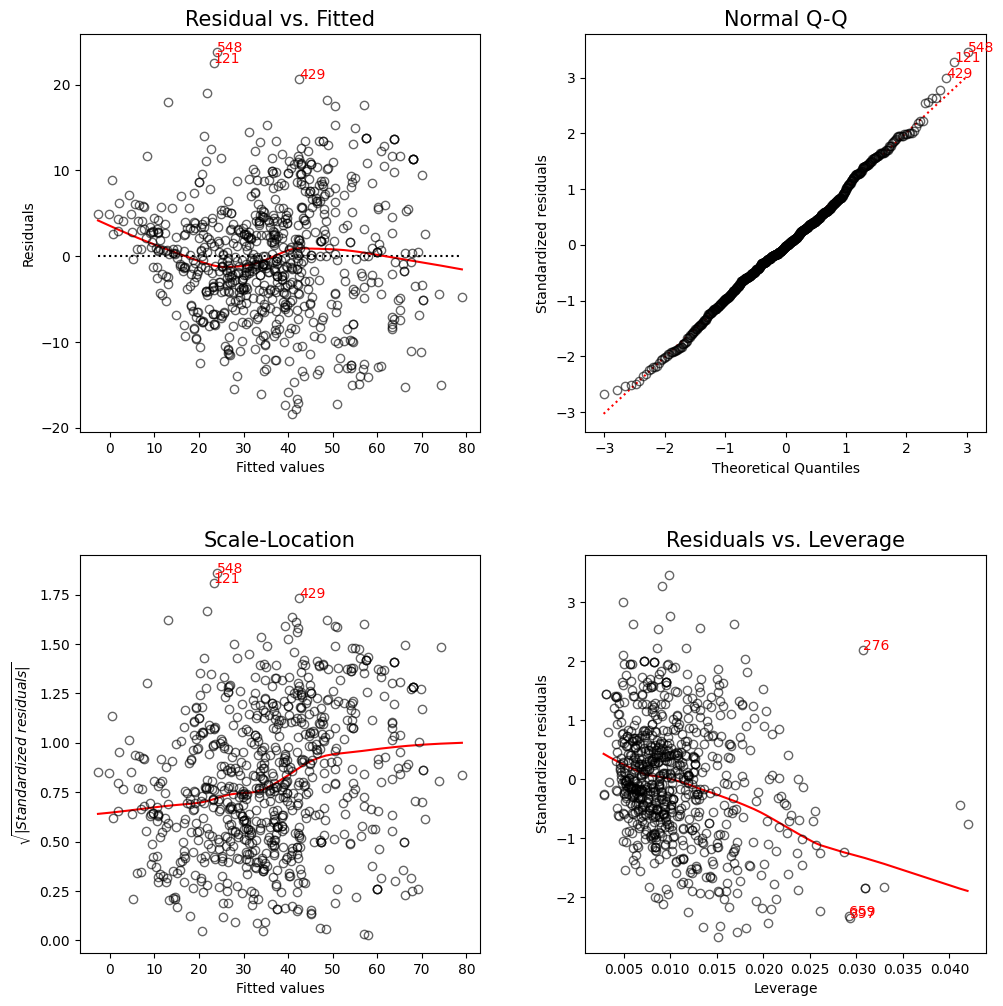

In [23]:
plt.figure(figsize = (10,10))
lmdiag.plot(sm.OLS(Y_train_no, sm.add_constant(X_train_no)).fit())